**Importação de bibliotecas**

In [1]:
#Primeiro, importamos as bibliotecas para realizar a análise
import pandas as pd
import matplotlib.pyplot as plt

**Utilização do pandas (ler csv)**

In [2]:
#Agora, lemos o dataset e tentamos exibi-lo para ver se a leitura foi realizada corretamente
Dados_Enem = pd.read_csv('DadosEnemRN_Filtrados.csv')
Dados_Enem.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,1,461.673184,532.437669,492.285892,498.521137
1,1,453.600000,678.900000,598.100000,391.400000
2,1,390.500000,542.600000,446.700000,453.800000
3,1,506.200000,590.800000,532.800000,392.400000
4,1,522.400000,640.400000,535.500000,612.500000


**Manipulação de listas, indexação por listas e função concat do pandas**

In [3]:
#Agora, criamos um array para armezenar os ídices de cada tipo de escola (pública e não pública)
Tipos_Escola = Dados_Enem['TP_ESCOLA']
count = 0
indicesPub = []
indicesPart = []
for i in Tipos_Escola:
    if i == 2:
        indicesPub.append(count)
    else:
        indicesPart.append(count)
    count+=1
# Notas da pública   ----------------------------
Notas_Natureza_Pub = Dados_Enem['NU_NOTA_CN'][indicesPub]
Notas_Humanas_Pub = Dados_Enem['NU_NOTA_CH'][indicesPub]
Notas_Linguagens_Pub = Dados_Enem['NU_NOTA_LC'][indicesPub]
Notas_Matematcica_Pub = Dados_Enem['NU_NOTA_MT'][indicesPub]
NotasGerais_Pub = pd.concat([Notas_Natureza_Pub, Notas_Humanas_Pub, Notas_Linguagens_Pub, Notas_Matematcica_Pub ], axis=1)
# Notas Não públicas ----------------------------
Notas_Natureza_NP = Dados_Enem['NU_NOTA_CN'][indicesPart]
Notas_Humanas_NP = Dados_Enem['NU_NOTA_CH'][indicesPart]
Notas_Linguagens_NP = Dados_Enem['NU_NOTA_LC'][indicesPart]
Notas_Matematcica_NP = Dados_Enem['NU_NOTA_MT'][indicesPart]
NotasGerais_NP = pd.concat([Notas_Natureza_NP, Notas_Humanas_NP, Notas_Linguagens_NP, Notas_Matematcica_NP ], axis=1)

**Criação de funções**

In [4]:
# Criando a função que irá contar quantos aluos tiraram acima de 500 em cada prova
def contador(Lista):
    count = 0
    for i in Lista:
        if i >= 500:
            count+=1
    return count

In [5]:
# Guardando as notas acima de 500 nas escolas públicas
Notas_P500_Pub = []
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_CN']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_CH']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_LC']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_MT']))
Notas_P500_Pub

[2889, 10951, 5751, 5276]

In [6]:
# Guardando as notas acima de 500 nas escolas não públicas
Notas_P500_NP = []
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_CN']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_CH']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_LC']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_MT']))
Notas_P500_NP

[32504, 89773, 53531, 45176]

**Subplot e pieplot**

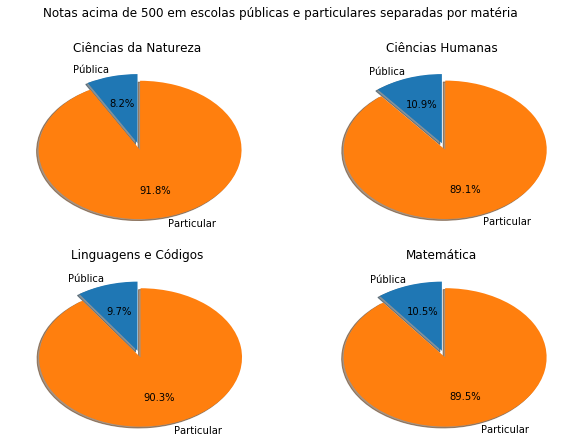

In [7]:
#Plotando o gráfico de cada prova individualmente através de subplots
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,7))
fig.suptitle('Notas acima de 500 em escolas públicas e particulares separadas por matéria')
ax1[0].pie([Notas_P500_Pub[0], Notas_P500_NP[0]], 
        labels=['Pública', 'Particular'], startangle=90, autopct='%1.1f%%', shadow=True, explode=[0,0.1])
ax1[0].set_title('Ciências da Natureza')
ax1[1].pie([Notas_P500_Pub[1], Notas_P500_NP[1]], 
        labels=['Pública', 'Particular'], startangle=90, autopct='%1.1f%%', shadow=True, explode=[0,0.1])
ax1[1].set_title('Ciências Humanas')
ax2[0].pie([Notas_P500_Pub[2], Notas_P500_NP[2]], 
        labels=['Pública', 'Particular'], startangle=90, autopct='%1.1f%%', shadow=True, explode=[0,0.1])
ax2[0].set_title('Linguagens e Códigos')
ax2[1].pie([Notas_P500_Pub[3], Notas_P500_NP[3]], 
        labels=['Pública', 'Particular'], startangle=90, autopct='%1.1f%%', shadow=True, explode=[0,0.1])
ax2[1].set_title('Matemática')
plt.show()

In [8]:
def soma (Lista):
    count = 0
    for i in Lista:
        count+=i
    return count

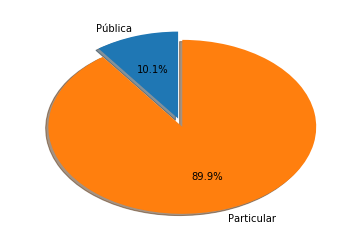

In [9]:
# Plotando o gráfico com a soma de todas as disciplinas
plt.pie([soma(Notas_P500_Pub), soma(Notas_P500_NP)], 
        labels=['Pública', 'Particular'], startangle=90, autopct='%1.1f%%', shadow=True, explode=[0,0.1])
plt.show()